In [5]:
import gym
import matplotlib.pyplot as plt
import torch

In [6]:
env = gym.make('FrozenLake-v0')

In [7]:
number_of_states = env.observation_space.n # 16
numbers_of_actions = env.action_space.n # 4

gamma = 0.95
learning_rate = 0.9

Q = torch.zeros([number_of_states, numbers_of_actions])

Episode finished after 5 steps
Episode finished after 11 steps
Episode finished after 3 steps
Episode finished after 2 steps
Episode finished after 2 steps
Episode finished after 4 steps
Episode finished after 10 steps
Episode finished after 2 steps
Episode finished after 6 steps
Episode finished after 18 steps
Episode finished after 2 steps
Episode finished after 8 steps
Episode finished after 8 steps
Episode finished after 2 steps
Episode finished after 2 steps
Episode finished after 10 steps
Episode finished after 3 steps
Episode finished after 2 steps
Episode finished after 4 steps
Episode finished after 26 steps
Episode finished after 10 steps
Episode finished after 4 steps
Episode finished after 11 steps
Episode finished after 8 steps
Episode finished after 7 steps
Episode finished after 24 steps
Episode finished after 4 steps
Episode finished after 8 steps
Episode finished after 5 steps
Episode finished after 2 steps
Episode finished after 6 steps
Episode finished after 11 steps

Episode finished after 64 steps
Episode finished after 80 steps
Episode finished after 19 steps
Episode finished after 12 steps
Episode finished after 52 steps
Episode finished after 23 steps
Episode finished after 22 steps
Episode finished after 14 steps
Episode finished after 100 steps
Episode finished after 46 steps
Episode finished after 88 steps
Episode finished after 48 steps
Episode finished after 15 steps
Episode finished after 39 steps
Episode finished after 17 steps
Episode finished after 29 steps
Episode finished after 46 steps
Episode finished after 12 steps
Episode finished after 62 steps
Episode finished after 58 steps
Episode finished after 37 steps
Episode finished after 40 steps
Episode finished after 70 steps
Episode finished after 32 steps
Episode finished after 56 steps
Episode finished after 11 steps
Episode finished after 39 steps
Episode finished after 23 steps
Episode finished after 8 steps
Episode finished after 21 steps
Episode finished after 74 steps
Episode 

Episode finished after 100 steps
Episode finished after 67 steps
Episode finished after 63 steps
Episode finished after 23 steps
Episode finished after 14 steps
Episode finished after 35 steps
Episode finished after 35 steps
Episode finished after 60 steps
Episode finished after 20 steps
Episode finished after 21 steps
Episode finished after 58 steps
Episode finished after 18 steps
Episode finished after 15 steps
Episode finished after 69 steps
Episode finished after 41 steps
Episode finished after 57 steps
Episode finished after 7 steps
Episode finished after 58 steps
Episode finished after 69 steps
Episode finished after 100 steps
Episode finished after 100 steps
Episode finished after 6 steps
Episode finished after 7 steps
Episode finished after 100 steps
Episode finished after 100 steps
Episode finished after 28 steps
Episode finished after 63 steps
Episode finished after 14 steps
Episode finished after 33 steps
Episode finished after 81 steps
Episode finished after 64 steps
Episod

Episode finished after 100 steps
Episode finished after 46 steps
Episode finished after 31 steps
Episode finished after 48 steps
Episode finished after 99 steps
Episode finished after 45 steps
Episode finished after 44 steps
Episode finished after 88 steps
Episode finished after 78 steps
Episode finished after 21 steps
Episode finished after 59 steps
Episode finished after 23 steps
Episode finished after 95 steps
Episode finished after 48 steps
Episode finished after 48 steps
Episode finished after 14 steps
Episode finished after 9 steps
Episode finished after 50 steps
Episode finished after 11 steps
Episode finished after 100 steps
Episode finished after 26 steps
Episode finished after 55 steps
Episode finished after 83 steps
Episode finished after 13 steps
Episode finished after 14 steps
Episode finished after 62 steps
Episode finished after 20 steps
Episode finished after 64 steps
Episode finished after 100 steps
Episode finished after 65 steps
Episode finished after 32 steps
Episod

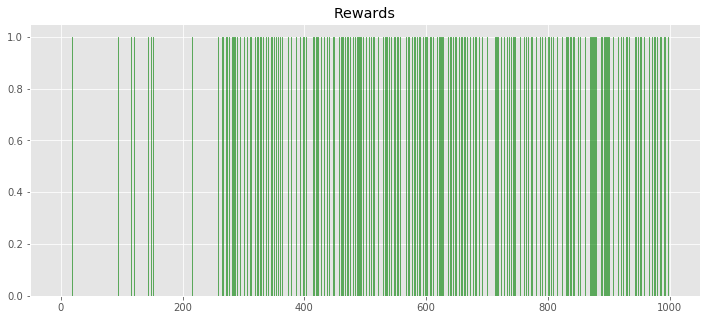

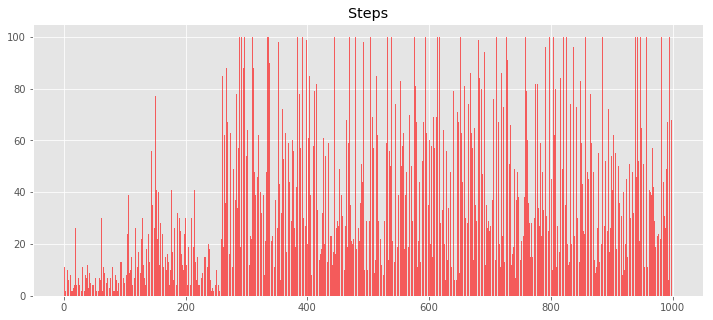

In [8]:
num_episodes = 1000
steps_total = []
rewards_total = []

for episode in range(num_episodes):
    state = env.reset()
    step = 0
    while True:
        step += 1
        random_values = Q[state] + torch.rand(1, numbers_of_actions) / 1000 # init space with random values
        action = torch.max(random_values, 1)[1][0].item()
        
        new_state, reward, done, info = env.step(action)
        
        Q[state, action] = (1 - learning_rate) * Q[state, action] + learning_rate * (reward + gamma * torch.max(Q[new_state]))
        state = new_state
        
        if done:
            steps_total.append(step)
            rewards_total.append(reward)
            print("Episode finished after %i steps" % step)
            break


print(Q)
print("Percent of episodes finished successfully: {0}".format(sum(rewards_total)/num_episodes))
print("Percent of episodes finished successfully (last 100 episodes): {0}".format(sum(rewards_total[-100:])/100))
print("Average number of steps: %.2f" % (sum(steps_total)/num_episodes))
print("Average number of steps (last 100 episodes): %.2f" % (sum(steps_total[-100:])/100))


plt.style.use('ggplot')

plt.figure(figsize=(12,5))
plt.title("Rewards")
plt.bar(torch.arange(len(rewards_total)), rewards_total, alpha=0.6, color='green')
plt.show()

plt.figure(figsize=(12,5))
plt.title("Steps")
plt.bar(torch.arange(len(steps_total)), steps_total, alpha=0.6, color='red')
plt.show()